In [1]:
import numpy as np
import pandas as pd

In [2]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

C:\Users\saksh\AppData\Local\Temp\ipykernel_22172\378180666.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [3]:
books['Image-URL-M'] = books['ISBN'].apply(
    lambda isbn: f"https://covers.openlibrary.org/b/isbn/{isbn}-M.jpg"
)

In [ ]:
books

In [5]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [6]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [9]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [10]:
books.duplicated().sum()

0

In [11]:
users.duplicated().sum()

0

In [12]:
ratings.duplicated().sum()

0

# EDA(Exploratory Data Analysis) : Books

In [14]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [15]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [16]:
books.dropna(inplace = True)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
# type casting
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int) 

In [19]:
out_of_bound_years = books[books['Year-Of-Publication']>2025]['Year-Of-Publication']

In [20]:
out_of_bound_years

37487     2030
55676     2030
78168     2030
80264     2050
97826     2050
116053    2038
118294    2026
192993    2030
228173    2030
240169    2030
255409    2037
260974    2030
Name: Year-Of-Publication, dtype: int32

In [21]:
books.drop(books[books['Year-Of-Publication']>2025].index, inplace = True )

In [22]:
books.shape

(271341, 8)

In [23]:
books[books['Year-Of-Publication']==0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,https://covers.openlibrary.org/b/isbn/31500003...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,https://covers.openlibrary.org/b/isbn/34231136...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,https://covers.openlibrary.org/b/isbn/05711976...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,https://covers.openlibrary.org/b/isbn/35962146...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,https://covers.openlibrary.org/b/isbn/88452290...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,https://covers.openlibrary.org/b/isbn/01402995...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,https://covers.openlibrary.org/b/isbn/03405711...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,https://covers.openlibrary.org/b/isbn/84272010...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,https://covers.openlibrary.org/b/isbn/08877817...,http://images.amazon.com/images/P/0887781721.0...


In [24]:
books.drop(books[books['Year-Of-Publication']==0].index, inplace = True )

In [25]:
books.shape

(266723, 8)

In [26]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266723 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 266723 non-null  object
 1   Book-Title           266723 non-null  object
 2   Book-Author          266723 non-null  object
 3   Year-Of-Publication  266723 non-null  int32 
 4   Publisher            266723 non-null  object
 5   Image-URL-S          266723 non-null  object
 6   Image-URL-M          266723 non-null  object
 7   Image-URL-L          266723 non-null  object
dtypes: int32(1), object(7)
memory usage: 17.3+ MB


# EDA(Exploratory Data Analysis) : Users

In [28]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [29]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [30]:
users.shape

(278858, 3)

In [31]:
users = users.iloc[:,1:]

# EDA(Exploratory Data Analysis) : Ratings

In [33]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


C:\Users\saksh\AppData\Local\Temp\ipykernel_22172\98658342.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = ratings['Book-Rating'])


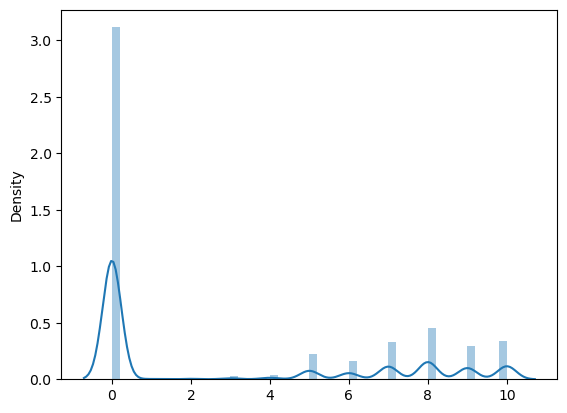

In [34]:
sns.distplot(x = ratings['Book-Rating'])
plt.show()

In [35]:
ratings['Book-Rating'].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

# Popularity based Recommender System

In [37]:
ratings_with_name = ratings.merge(books,on = 'ISBN')

In [38]:
ratings_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,https://covers.openlibrary.org/b/isbn/03454510...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,https://covers.openlibrary.org/b/isbn/01550612...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,https://covers.openlibrary.org/b/isbn/04465208...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,https://covers.openlibrary.org/b/isbn/05216561...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,https://covers.openlibrary.org/b/isbn/05217950...,http://images.amazon.com/images/P/0521795028.0...


In [39]:
num_ratings_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()

In [40]:
num_ratings_df.rename(columns={'Book-Rating':'num_ratings'},inplace = True)

In [41]:
num_ratings_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
237443,Ã?Â?lpiraten.,2
237444,Ã?Â?rger mit Produkt X. Roman.,4
237445,Ã?Â?sterlich leben.,1
237446,Ã?Â?stlich der Berge.,3


In [42]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'}, inplace = True)

In [43]:
avg_rating_df  

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
237443,Ã?Â?lpiraten.,0.000000
237444,Ã?Â?rger mit Produkt X. Roman.,5.250000
237445,Ã?Â?sterlich leben.,7.000000
237446,Ã?Â?stlich der Berge.,2.666667


In [44]:
popularity_df = avg_rating_df.merge(num_ratings_df, on = 'Book-Title')

In [45]:
popularity_df = popularity_df[popularity_df['num_ratings']>=250].sort_values('avg_rating',ascending = False).head(50)

In [46]:
popularity_df

,Book-Title,avg_rating,num_ratings
79027,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428
79015,Harry Potter and the Goblet of Fire (Book 4),5.824289,387
79034,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278
79019,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347
79007,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556
188465,The Hobbit : The Enchanting Prelude to The Lor...,5.007117,281
184242,The Fellowship of the Ring (The Lord of the Ri...,4.948370,368
79038,Harry Potter and the Sorcerer's Stone (Harry P...,4.895652,575
208194,"The Two Towers (The Lord of the Rings, Part 2)",4.880769,260
216479,To Kill a Mockingbird,4.700000,510


In [47]:
popularity_df = popularity_df.merge(books, on = 'Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating','Year-Of-Publication']]

In [48]:
popularity_df.reset_index()

,index,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating,Year-Of-Publication
0,0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,https://covers.openlibrary.org/b/isbn/04391363...,428,5.852804,1999
1,3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,https://covers.openlibrary.org/b/isbn/04391395...,387,5.824289,2000
2,5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,https://covers.openlibrary.org/b/isbn/05903534...,278,5.737410,1998
3,9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,https://covers.openlibrary.org/b/isbn/04393580...,347,5.501441,2003
4,13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,https://covers.openlibrary.org/b/isbn/04390648...,556,5.183453,2000
5,16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,https://covers.openlibrary.org/b/isbn/03453396...,281,5.007117,1986
6,17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,https://covers.openlibrary.org/b/isbn/03453397...,368,4.948370,1986
7,26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,https://covers.openlibrary.org/b/isbn/05903534...,575,4.895652,1999
8,28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,https://covers.openlibrary.org/b/isbn/03453397...,260,4.880769,1986
9,39,To Kill a Mockingbird,Harper Lee,https://covers.openlibrary.org/b/isbn/04463107...,510,4.700000,1988


# Collaborative FIltering Based Recommender System

In [50]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [51]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [52]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50

In [53]:
famous_books = y[y].index

In [54]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=698)

In [55]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [56]:
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1111,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,https://covers.openlibrary.org/b/isbn/00254273...,http://images.amazon.com/images/P/002542730X.0...
1124,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,https://covers.openlibrary.org/b/isbn/00609305...,http://images.amazon.com/images/P/0060930535.0...
1126,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,https://covers.openlibrary.org/b/isbn/00609344...,http://images.amazon.com/images/P/0060934417.0...
1129,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,https://covers.openlibrary.org/b/isbn/00610090...,http://images.amazon.com/images/P/0061009059.0...
1135,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,https://covers.openlibrary.org/b/isbn/00644018...,http://images.amazon.com/images/P/006440188X.0...


In [57]:
pt = final_ratings.pivot_table(index='Book-Title', columns='User-ID',values='Book-Rating')

In [58]:
pt.fillna(0,inplace = True)

In [59]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
  from sklearn.metrics.pairwise import cosine_similarity

In [61]:
similarity_score = cosine_similarity(pt)

In [62]:
similarity_score

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04402619],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14549498],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.11012672],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0200112 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.1081564 ],
       [0.04402619, 0.14549498, 0.11012672, ..., 0.0200112 , 0.1081564 ,
        1.        ]])

In [63]:
def recommend(book_name):
    try:
        # make sure the book exists
        if book_name not in pt.index:
            return ["Book not found"]

        index = np.where(pt.index == book_name)[0][0]
        distances = similarity_score[index]
        book_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
        recommendations = [final_ratings.iloc[i[0]]['Book-Title'] for i in book_list]
        return recommendations
    except Exception as e:
        return [f"Error: {str(e)}"]


In [64]:
# this is how we can get the index of a particular book
np.where(pt.index =='1984')[0][0]

0

In [65]:
 recommend('1984')

['The Promise',
 "Vinegar Hill (Oprah's Book Club (Paperback))",
 'Two for the Dough',
 'Isle of Dogs',
 'The Pull of the Moon']

In [135]:
import pickle
#pickle.dump(books, open('books.pkl', 'wb'))
pickle.dump(similarity_score, open('similarity.pkl', 'wb'))
pickle.dump(popularity_df, open('popularity_df.pkl', 'wb'))
pickle.dump(final_ratings, open('final_ratings.pkl', 'wb'))

In [131]:
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1111,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,https://covers.openlibrary.org/b/isbn/00254273...,http://images.amazon.com/images/P/002542730X.0...
1124,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,https://covers.openlibrary.org/b/isbn/00609305...,http://images.amazon.com/images/P/0060930535.0...
1126,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,https://covers.openlibrary.org/b/isbn/00609344...,http://images.amazon.com/images/P/0060934417.0...
1129,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,https://covers.openlibrary.org/b/isbn/00610090...,http://images.amazon.com/images/P/0061009059.0...
1135,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,https://covers.openlibrary.org/b/isbn/00644018...,http://images.amazon.com/images/P/006440188X.0...
